# Importing Libraries

In [1]:
from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os

# creating CSV file

# Training data

In [3]:
dataset_path = os.listdir('data/train')

label_types = os.listdir('data/train')

print (label_types)  

['Walk', 'Sit', 'Jump', 'Turn', 'Stand', 'Run']


In [4]:
rooms = []

for item in dataset_path:
    all_rooms = os.listdir('data/train' + '/' +item)

for room in all_rooms:
    rooms.append((item, str('data/train' + '/' +item) + '/' + room))
           
train_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(train_df.head())
print(train_df.tail())

    tag                      video_name
0  Walk   data/train/Walk/Walk_10_8.mp4
1  Walk   data/train/Walk/Walk_10_9.mp4
2  Walk  data/train/Walk/Walk_14_19.mp4
3  Walk  data/train/Walk/Walk_14_18.mp4
4  Walk  data/train/Walk/Walk_14_24.mp4
     tag                    video_name
145  Run  data/train/Run/Run_11_15.mp4
146  Run  data/train/Run/Run_11_14.mp4
147  Run  data/train/Run/Run_11_28.mp4
148  Run  data/train/Run/Run_11_16.mp4
149  Run    data/train/Run/Run_1_5.mp4


In [5]:
df = train_df.loc[:,['video_name','tag']]
df
df.to_csv('train.csv')

# Testing data

In [6]:

dataset_path = os.listdir('data/test')

label_types = os.listdir('data/test')

print (label_types)  

['Walk', 'Sit', 'Jump', 'Turn', 'Stand', 'Run']


In [7]:
rooms = []

for item in dataset_path:
    all_rooms = os.listdir('data/test' + '/' +item)

for room in all_rooms:
    rooms.append((item, str('data/test' + '/' +item) + '/' + room))
           
train_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(train_df.head())
print(train_df.tail())

    tag              video_name
0  Walk  data/test/Walk/296.mp4
1  Walk  data/test/Walk/309.mp4
2  Walk  data/test/Walk/308.mp4
3  Walk  data/test/Walk/297.mp4
4  Walk  data/test/Walk/295.mp4
    tag             video_name
91  Run  data/test/Run/178.mp4
92  Run  data/test/Run/176.mp4
93  Run  data/test/Run/189.mp4
94  Run  data/test/Run/188.mp4
95  Run  data/test/Run/177.mp4


In [8]:
df = train_df.loc[:,['video_name','tag']]
df
df.to_csv('test.csv')

# import csv

In [9]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(f"Total videos for training: {len(train_df)}")
print(f"Total videos for testing: {len(test_df)}")


test_df.head(10)

Total videos for training: 150
Total videos for testing: 96


,Unnamed: 0,video_name,tag
0,0,data/test/Walk/296.mp4,Walk
1,1,data/test/Walk/309.mp4,Walk
2,2,data/test/Walk/308.mp4,Walk
3,3,data/test/Walk/297.mp4,Walk
4,4,data/test/Walk/295.mp4,Walk
5,5,data/test/Walk/300.mp4,Walk
6,6,data/test/Walk/301.mp4,Walk
7,7,data/test/Walk/303.mp4,Walk
8,8,data/test/Walk/302.mp4,Walk
9,9,data/test/Walk/299.mp4,Walk


# Image enhancement

In [10]:
import cv2
import numpy as np
import os
import shutil

def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def process_video(video_input_path):
    temp_output_path = video_input_path + ".temp.mp4"

    try:
        cap = cv2.VideoCapture(video_input_path)

        if not cap.isOpened():
            print("Error: Could not open video.")
            return

        fps = cap.get(cv2.CAP_PROP_FPS)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        out = cv2.VideoWriter(temp_output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

        gamma_value = 3

        while True:
            ret, frame = cap.read()
            if not ret:
                break  

            corrected_frame = gamma_correction(frame, gamma_value)

            out.write(corrected_frame)
        
        cap.release()
        out.release()

        shutil.move(temp_output_path, video_input_path)

        print("Processed:", video_input_path)
    except Exception as e:
        print("Error processing:", video_input_path)
        print(e)

for video_name in test_df['video_name']:
    process_video(video_name)

for video_name in train_df['video_name']:
    process_video(video_name)

Processed: data/test/Walk/296.mp4
Processed: data/test/Walk/309.mp4
Processed: data/test/Walk/308.mp4
Processed: data/test/Walk/297.mp4
Processed: data/test/Walk/295.mp4
Processed: data/test/Walk/300.mp4
Processed: data/test/Walk/301.mp4
Processed: data/test/Walk/303.mp4
Processed: data/test/Walk/302.mp4
Processed: data/test/Walk/299.mp4
Processed: data/test/Walk/306.mp4
Processed: data/test/Walk/307.mp4
Processed: data/test/Walk/298.mp4
Processed: data/test/Walk/305.mp4
Processed: data/test/Walk/304.mp4
Processed: data/test/Walk/310.mp4
Processed: data/test/Sit/209.mp4
Processed: data/test/Sit/208.mp4
Processed: data/test/Sit/203.mp4
Processed: data/test/Sit/216.mp4
Processed: data/test/Sit/202.mp4
Processed: data/test/Sit/214.mp4
Processed: data/test/Sit/215.mp4
Processed: data/test/Sit/211.mp4
Processed: data/test/Sit/205.mp4
Processed: data/test/Sit/204.mp4
Processed: data/test/Sit/210.mp4
Processed: data/test/Sit/206.mp4
Processed: data/test/Sit/212.mp4
Processed: data/test/Sit/21

Processed: data/train/Stand/Stand_3_8.mp4
Processed: data/train/Stand/Stand_2_8.mp4
Processed: data/train/Stand/Stand_2_9.mp4
Processed: data/train/Run/Run_11_1.mp4
Processed: data/train/Run/Run_11_27.mp4
Processed: data/train/Run/Run_11_25.mp4
Processed: data/train/Run/Run_11_31.mp4
Processed: data/train/Run/Run_11_3.mp4
Processed: data/train/Run/Run_11_2.mp4
Processed: data/train/Run/Run_11_30.mp4
Processed: data/train/Run/Run_11_20.mp4
Processed: data/train/Run/Run_1_10.mp4
Processed: data/train/Run/Run_11_7.mp4
Processed: data/train/Run/Run_1_11.mp4
Processed: data/train/Run/Run_11_21.mp4
Processed: data/train/Run/Run_1_13.mp4
Processed: data/train/Run/Run_11_4.mp4
Processed: data/train/Run/Run_1_12.mp4
Processed: data/train/Run/Run_11_22.mp4
Processed: data/train/Run/Run_11_8.mp4
Processed: data/train/Run/Run_1_1.mp4
Processed: data/train/Run/Run_11_11.mp4
Processed: data/train/Run/Run_11_29.mp4
Processed: data/train/Run/Run_11_15.mp4
Processed: data/train/Run/Run_11_14.mp4
Proces

# Preprocessing Technique’s 

In [11]:
# Train
features = []
labels = []
# Test
features_1 = []
labels_1 = []

In [12]:
import cv2
import numpy as np
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input

def extract_features(frames):
    base_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
    preprocessed_frames = preprocess_input(np.array(frames))
    features = base_model.predict(preprocessed_frames)
    return features

def process_video(video_path, max_frames=25):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    sampling_interval = max(1, frame_count // max_frames)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        frame = cv2.resize(frame, (299, 299))
        
        frames.append(frame)
        for _ in range(sampling_interval - 1):
            cap.grab()
        if len(frames) == max_frames:
            break
    
    cap.release()
    
    if len(frames) < max_frames:
        frames.extend([frames[-1]] * (max_frames - len(frames)))
    

    features = extract_features(frames)
    
    return features


# Training video preprocessing

In [13]:
label_processor = keras.layers.StringLookup(num_oov_indices=0, vocabulary=np.unique(train_df["tag"]))
print(label_processor.get_vocabulary())

labels = train_df["tag"].values
labels = label_processor(labels[..., None]).numpy()
labels

['Jump', 'Run', 'Sit', 'Stand', 'Turn', 'Walk']


array([[5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
    

In [14]:
from collections import Counter 
my_list_tuples = [tuple(x) for x in labels]
counter = Counter(my_list_tuples)
unique_count = len(counter)

print("Number of unique values:", unique_count)

print("Frequency of each unique value:")
for value, frequency in counter.items():
    print(f"{value}: {frequency}")

Number of unique values: 6
Frequency of each unique value:
(5,): 25
(2,): 25
(0,): 25
(4,): 25
(3,): 25
(1,): 25


In [15]:
# Train 

for videos in train_df['video_name']:
    video_path = videos
    video_features = process_video(video_path)
    features.append(video_features)
    

1/1 [==============================] - 5s 5s/step


# Testing video preprocessing

In [16]:
label_processor = keras.layers.StringLookup(num_oov_indices=0, vocabulary=np.unique(test_df["tag"]))
print(label_processor.get_vocabulary())

labels_1 = test_df["tag"].values
labels_1 = label_processor(labels_1[..., None]).numpy()
labels_1

['Jump', 'Run', 'Sit', 'Stand', 'Turn', 'Walk']


array([[5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [1],
       [1],
    

In [17]:
from collections import Counter 
my_list_tuples = [tuple(x) for x in labels_1]
counter = Counter(my_list_tuples)
unique_count = len(counter) 

print("Number of unique values:", unique_count)

print("Frequency of each unique value:")
for value, frequency in counter.items():
    print(f"{value}: {frequency}")

Number of unique values: 6
Frequency of each unique value:
(5,): 16
(2,): 15
(0,): 17
(4,): 17
(3,): 16
(1,): 15


In [18]:
# Test
for videos in test_df['video_name']:
    video_path = videos
    video_features = process_video(video_path)
    features_1.append(video_features)
    

1/1 [==============================] - 3s 3s/step


In [19]:
print('train features:')
print(len(features))
print('train labels:')
print(len(labels))

print('test features:')
print(len(features_1))
print('test labels:')
print(len(labels_1))

train features:
150
train labels:
150
test features:
96
test labels:
96


In [20]:
X_train = features

y_train = labels
X_test = features_1
y_test = labels_1

In [21]:
# Check shapes of X_train
for i, x_train_element in enumerate(X_train):
    print(f"Shape of X_train[{i}]:", x_train_element.shape)

# Check shapes of X_test
for i, x_test_element in enumerate(X_test):
    print(f"Shape of X_test[{i}]:", x_test_element.shape)

Shape of X_train[0]: (25, 2048)
Shape of X_train[1]: (25, 2048)
Shape of X_train[2]: (25, 2048)
Shape of X_train[3]: (25, 2048)
Shape of X_train[4]: (25, 2048)
Shape of X_train[5]: (25, 2048)
Shape of X_train[6]: (25, 2048)
Shape of X_train[7]: (25, 2048)
Shape of X_train[8]: (25, 2048)
Shape of X_train[9]: (25, 2048)
Shape of X_train[10]: (25, 2048)
Shape of X_train[11]: (25, 2048)
Shape of X_train[12]: (25, 2048)
Shape of X_train[13]: (25, 2048)
Shape of X_train[14]: (25, 2048)
Shape of X_train[15]: (25, 2048)
Shape of X_train[16]: (25, 2048)
Shape of X_train[17]: (25, 2048)
Shape of X_train[18]: (25, 2048)
Shape of X_train[19]: (25, 2048)
Shape of X_train[20]: (25, 2048)
Shape of X_train[21]: (25, 2048)
Shape of X_train[22]: (25, 2048)
Shape of X_train[23]: (25, 2048)
Shape of X_train[24]: (25, 2048)
Shape of X_train[25]: (25, 2048)
Shape of X_train[26]: (25, 2048)
Shape of X_train[27]: (25, 2048)
Shape of X_train[28]: (25, 2048)
Shape of X_train[29]: (25, 2048)
Shape of X_train[30]

# flatten

In [22]:
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)

# Reshape the arrays
X_train_flattened = X_train_array.reshape(X_train_array.shape[0], -1)
X_test_flattened = X_test_array.reshape(X_test_array.shape[0], -1)


In [23]:
for i, x_train_element in enumerate(X_train_flattened):
    print(f"Shape of X_train[{i}]:", x_train_element.shape)

for i, x_test_element in enumerate(X_test_flattened):
    print(f"Shape of X_test[{i}]:", x_test_element.shape)

Shape of X_train[0]: (51200,)
Shape of X_train[1]: (51200,)
Shape of X_train[2]: (51200,)
Shape of X_train[3]: (51200,)
Shape of X_train[4]: (51200,)
Shape of X_train[5]: (51200,)
Shape of X_train[6]: (51200,)
Shape of X_train[7]: (51200,)
Shape of X_train[8]: (51200,)
Shape of X_train[9]: (51200,)
Shape of X_train[10]: (51200,)
Shape of X_train[11]: (51200,)
Shape of X_train[12]: (51200,)
Shape of X_train[13]: (51200,)
Shape of X_train[14]: (51200,)
Shape of X_train[15]: (51200,)
Shape of X_train[16]: (51200,)
Shape of X_train[17]: (51200,)
Shape of X_train[18]: (51200,)
Shape of X_train[19]: (51200,)
Shape of X_train[20]: (51200,)
Shape of X_train[21]: (51200,)
Shape of X_train[22]: (51200,)
Shape of X_train[23]: (51200,)
Shape of X_train[24]: (51200,)
Shape of X_train[25]: (51200,)
Shape of X_train[26]: (51200,)
Shape of X_train[27]: (51200,)
Shape of X_train[28]: (51200,)
Shape of X_train[29]: (51200,)
Shape of X_train[30]: (51200,)
Shape of X_train[31]: (51200,)
Shape of X_train[3

# Metric 

In [24]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
def getConfMatrix(pred_data, actual):
    conf_mat = confusion_matrix(actual, pred_data, labels=[0,1]) 
    micro = f1_score(actual, pred_data, average='micro') 
    macro = f1_score(actual,pred_data, average='macro')
    sns.heatmap(conf_mat, annot = True, fmt=".0f", annot_kws={"size": 18})
    print('F1 Micro: '+ str(micro))
    print('F1 Macro: '+ str(macro))

# ELM

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from skelm import ELMClassifier

elm = ELMClassifier()

elm.fit(X_train_flattened, y_train)

y_pred = elm.predict(X_test_flattened)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.21875


F1 Micro: 0.21875
F1 Macro: 0.20811594202898556


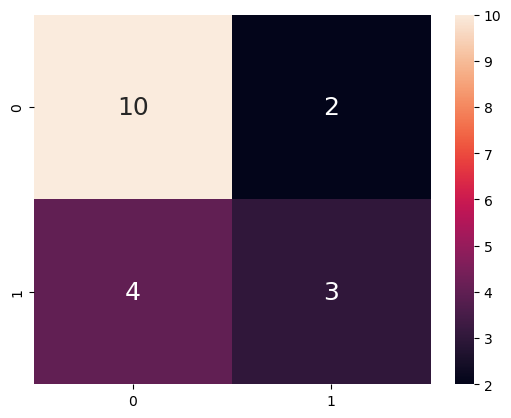

In [33]:
getConfMatrix(y_pred,y_test)

# Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()

clf.fit(X_train_flattened, y_train)

y_pred = clf.predict(X_test_flattened)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.1875


/Users/joshua/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Micro: 0.1875
F1 Macro: 0.11413139329805998


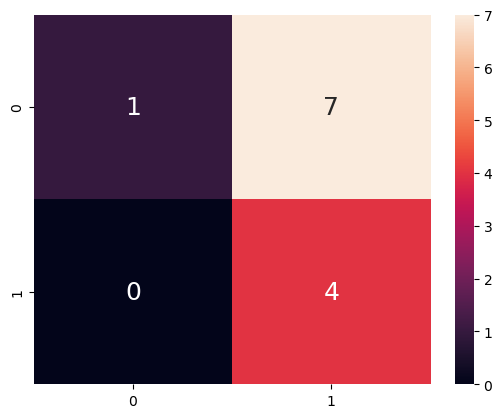

In [28]:
getConfMatrix(y_pred,y_test)

# LogisticRegression

In [38]:
import numpy as np
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial')

classifier.fit(X_train_flattened, y_train)

y_pred = classifier.predict(X_test_flattened)

print("Classification complete!")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/Users/joshua/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification complete!
Accuracy: 0.125


/Users/joshua/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Micro: 0.125
F1 Macro: 0.1055227921812989


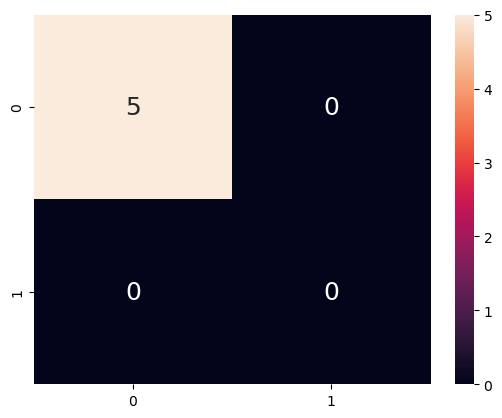

In [39]:
getConfMatrix(y_pred,y_test)